In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
#plt.rcParams['font.size'] = 14
n_ammino=5
n_sub_ammino=4
n_hidden=6

# Load model weigths to plot

In [2]:
file_name='Models/RMSprop_01_1_spin.npz' # the best training so far

model = np.load(file_name)        
w = model['w']
a = model['a']
b = model['b']

# One hot encoding

In [3]:
v=np.eye(4)#*2-1
vv=v*2-1
v1,v2,v3,v4=v[:]
vv1,vv2,vv3,vv4=vv[:]

print('v1: ',v2, v1.shape)

v1:  [0. 1. 0. 0.] (4,)


# Weights

In [4]:
w[:,0] # first hidden unit weigths

array([ 2.22404634,  2.26870435, -1.08193859, -1.38549812, -0.64119376,
       -1.91105172,  1.29748125,  1.34855692,  1.53982589,  1.63278006,
       -1.83589408, -0.58140709, -0.50801148, -1.4953401 ,  1.76272698,
        1.90482749,  1.61199014,  1.48893508, -1.65714928, -0.73887316])

In [5]:
ww=w.reshape((n_ammino,n_sub_ammino, n_hidden)) #reshaped: one matrix for each hidden l, one row for each site,
np.dot(ww[:,:,0], v1) # compute per site contribution of each 4 amminoacids types for hidden l=0

array([ 2.22404634, -0.64119376,  1.53982589, -0.50801148,  1.61199014])

In [6]:
output=np.zeros((4,5,n_hidden))
output_vv=np.zeros((4,5,n_hidden))


for h in range(n_hidden):
    output[:,:,h]=np.array([np.dot(ww[:,:,h], v1),
                     np.dot(ww[:,:,h], v2),
                     np.dot(ww[:,:,h], v3),
                     np.dot(ww[:,:,h], v4)])
    output_vv[:,:,h]=np.array([np.dot(ww[:,:,h], vv1),
                     np.dot(ww[:,:,h], vv2),
                     np.dot(ww[:,:,h], vv3),
                     np.dot(ww[:,:,h], vv4)])

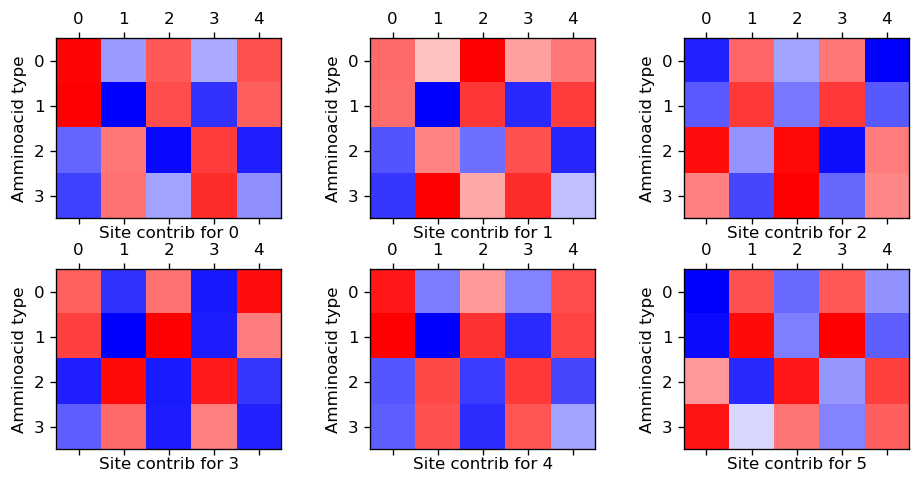

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,4), dpi=120)
fig.tight_layout()

for h in range(n_hidden):
    ax[h//3][h%3].matshow(output[:,:,h], cmap='bwr')
    ax[h//3][h%3].set_xlabel('Site contrib for '+str(h))
    ax[h//3][h%3].set_ylabel('Amminoacid type')

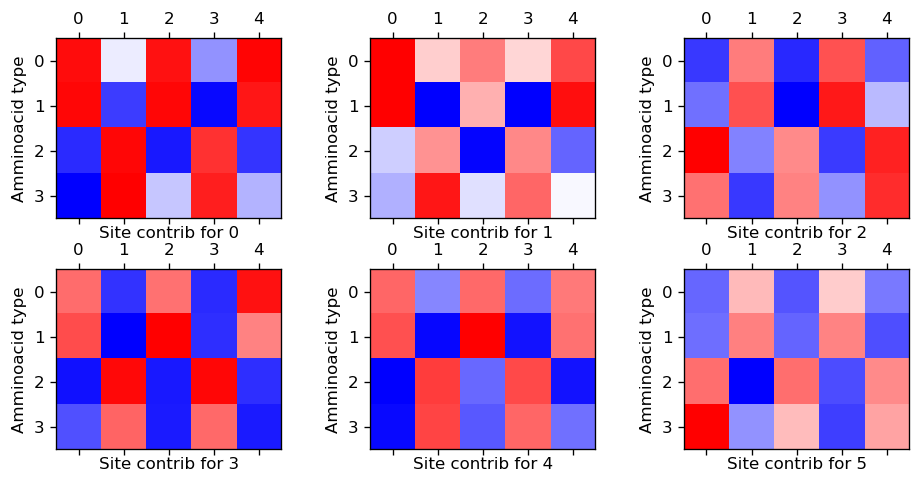

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,4), dpi=120)
fig.tight_layout()

for h in range(n_hidden):
    ax[h//3][h%3].matshow(output_vv[:,:,h], cmap='bwr')
    ax[h//3][h%3].set_xlabel('Site contrib for '+str(h))
    ax[h//3][h%3].set_ylabel('Amminoacid type')


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


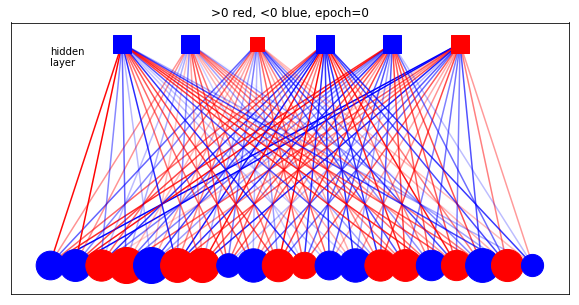

In [9]:
L=20
M=6

def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [10]:
w[:,0].reshape((5,4))

array([[ 2.22404634,  2.26870435, -1.08193859, -1.38549812],
       [-0.64119376, -1.91105172,  1.29748125,  1.34855692],
       [ 1.53982589,  1.63278006, -1.83589408, -0.58140709],
       [-0.50801148, -1.4953401 ,  1.76272698,  1.90482749],
       [ 1.61199014,  1.48893508, -1.65714928, -0.73887316]])

In [11]:
w.flatten().reshape((6,5,4))

array([[[ 2.22404634,  0.97827451, -1.40256852,  1.38040164],
        [ 1.92291699, -2.29353609,  2.26870435,  0.97136124],
        [-1.06688407,  1.65901047,  2.103267  , -2.21343544],
        [-1.08193859, -0.59881437,  1.34751606, -1.82893509],
        [-1.18446751,  0.45945187, -1.38549812, -0.74928697]],

       [[ 0.65573132, -1.2911153 , -1.11783356,  1.48336539],
        [-0.64119376,  0.54506457,  0.81291998, -1.65813856],
        [-0.87647294,  1.01094695, -1.91105172, -1.02283919],
        [ 1.08221301, -2.09024685, -1.84900152,  1.55064366],
        [ 1.29748125,  0.85321948, -0.72664471,  2.10360683]],

       [[ 1.53404991, -1.98306883,  1.34855692,  1.49238227],
        [-1.17980887,  1.32689635,  1.47166916, -0.62860748],
        [ 1.53982589,  1.50622712, -0.64228284,  1.23358677],
        [ 0.90218374, -1.46642824,  1.63278006,  1.23412045],
        [-0.88728159,  2.20027173,  1.71581477, -1.31204418]],

       [[-1.83589408, -0.46978066,  1.3681536 , -1.86518348],
  